## 나이브 베이즈(Naive Bayes)

![](https://velog.velcdn.com/images/newnew_daddy/post/3b84a787-6be6-4449-870c-f30cdb2bc0d5/image.png)

#### 1. **베이즈 정리**
- 베이즈 정리는 사전 확률과 조건부 확률을 이용해 사후 확률을 계산하는 정리이다. 
- 이를 통해 새로운 데이터가 주어졌을 때 특정 클래스에 속할 확률을 추정할 수 있다.
- 베이즈 정리 수식:
    $$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$

    - P(C|X) \: 주어진 데이터 X에 대해 클래스 C일 확률 (사후 확률)
    - P(X|C) \: 클래스 C일 때 데이터 X가 나타날 확률 (우도)
    - P(C) \: 클래스 C가 나타날 확률 (사전 확률)
    - P(X) \: 데이터 X가 나타날 확률 (정규화 상수)
- 베이즈 정리 예시 (https://www.synapsoft.co.kr/blog/6002/)
    1. 평소에 60%의 확률로 거짓말을 하는 사람이 있다. 우리는 90%의 정확도를 가진 거짓말 탐지기를 통해 이 사람의 말이 거짓인지를 판단하고자 합니다. 거짓말 탐지기의 관찰결과를 토대로 어떤 사람의 말이 거짓일 사후확률은? (54/58)
    2. 1,2번 조립라인에서 각각 1000대의 제품이 생산된다. 1번 조립라인에서 생산된 제품의 10%가 불량이고, 2번 조립라인에서 생산된 제품의 15%가 불량일 때, 불량 제품이 1번 조립라인에서 생산되었을 확률은? (40%)
    3. 주민이 폐암에 걸릴 확률이 1%이다. 주민한명이 폐암을 99% 진단하는 시약으로 진단한 결과 폐암 양성반응을 확인했을 경우, 이 주민이 실제로 폐암에 걸렸을 확률은? (99/198)

#### 2. **나이브 가정**
- 나이브 베이즈는 모든 특성은 다른 특성에 영향을 받지 않는다는 특성 간의 독립을 가정한다.
- 이러한 가정하에서 각각의 특성에 대해 독립적인 확률을 계산한다.
- 원래는 각 특성별로 어느정도 연관성이 존재하지만 연관성을 무시하고 독립적이라고 가정하여 Naive(순진한, 느슨한) 라고 부른다.

#### 3. **사용 사례**
- 텍스트나 문서 등 자연어가 들어간 데이터를 분석하여 분류를 진행하고자 할 때 많이 사용된다.
- 스팸메일 필터링, 문서 분류, 감성 분석, 정신 상태 예측 등

#### 스팸메일 분류 실습 - 이진 분류

#### 1) 데이터 읽기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dataset/spam.csv', encoding='utf-8')

df.head(), df.shape

(   type                                               text
 0   ham  Hope you are having a good week. Just checking in
 1   ham                            K..give back my thanks.
 2   ham        Am also doing in cbe only. But have to pay.
 3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
 4  spam  okmail: Dear Dave this is your final notice to...,
 (5559, 2))

In [3]:
X = df.text.values
y = df.type.values

df['type'].value_counts()

type
ham     4812
spam     747
Name: count, dtype: int64

#### 2) 자연어 -> 벡터 변환

In [4]:
## 문서를 벡터 표현식으로 변형
## https://m.blog.naver.com/myincizor/221643794025

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

doc1 = "I like python"
doc2 = "I hate python"
doc_term_matrix = count_vec.fit_transform([doc1, doc2]).toarray()

doc_term_matrix

array([[0, 1, 1],
       [1, 0, 1]])

In [5]:
## 단어 빈도 출력

count_vec.vocabulary_

{'like': 1, 'python': 2, 'hate': 0}

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
## 관사와 같이 자주 나오지만 중요하지 않은 단어 제거
## 5개 이하로 나온 단어 무시

vectorizer = CountVectorizer(min_df=5)

X_vec = vectorizer.fit_transform(X)

In [8]:
from collections import Counter

Counter(vectorizer.vocabulary_)

Counter({'zed': 1799,
         'yup': 1798,
         'yun': 1797,
         'yrs': 1796,
         'yr': 1795,
         'yourself': 1794,
         'yours': 1793,
         'your': 1792,
         'you': 1791,
         'yogasana': 1790,
         'yoga': 1789,
         'yo': 1788,
         'ym': 1787,
         'yijue': 1786,
         'yet': 1785,
         'yesterday': 1784,
         'yest': 1783,
         'yes': 1782,
         'yep': 1781,
         'years': 1780,
         'year': 1779,
         'yeah': 1778,
         'yay': 1777,
         'yar': 1776,
         'yan': 1775,
         'yahoo': 1774,
         'ya': 1773,
         'xy': 1772,
         'xxxx': 1771,
         'xxx': 1770,
         'xx': 1769,
         'xmas': 1768,
         'xchat': 1767,
         'www': 1766,
         'wun': 1765,
         'wrong': 1764,
         'write': 1763,
         'wow': 1762,
         'wouldn': 1761,
         'would': 1760,
         'wot': 1759,
         'worth': 1758,
         'worse': 1757,
         'worr

In [9]:
## 단어의 종류가 1800개

X_vec.shape

(5559, 1800)

In [10]:
type(X_vec), type(y)

(scipy.sparse._csr.csr_matrix, numpy.ndarray)

#### 3) Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_vec.toarray(), y, test_size=0.25, random_state=42)

#### 4) Gaussian Naive Bayes 모델 생성

In [12]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB

gnb = GNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = gnb.predict(X_test)

yt  = pd.DataFrame(y_test, columns=['test'])
yp  = pd.DataFrame(y_pred, columns=['pred'])

pd.concat([yt, yp], axis=1)

,test,pred
0,ham,ham
1,ham,ham
2,ham,ham
3,ham,spam
4,ham,spam
...,...,...
1385,ham,ham
1386,ham,spam
1387,ham,ham
1388,ham,ham


In [14]:
## 모델 정확도 평가

print("Train : ", gnb.score(X_train, y_train))
print("Test : ", gnb.score(X_test, y_test))

Train :  0.8716718637562965
Test :  0.8532374100719424


In [15]:
mapping = {'ham': 0, 'spam': 1}
y_test_label = [mapping[label] for label in y_test]
y_pred_label = [mapping[label] for label in y_pred]

Accuracy: 0.853
--------------------------------------------------
Precision: 0.468
--------------------------------------------------
Recall: 0.917
--------------------------------------------------
F1 Score: 0.619
--------------------------------------------------
AUC: 0.88
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1209
           1       0.47      0.92      0.62       181

    accuracy                           0.85      1390
   macro avg       0.73      0.88      0.76      1390
weighted avg       0.92      0.85      0.87      1390

Confusion Matrix:
[[1020  189]
 [  15  166]]
--------------------------------------------------


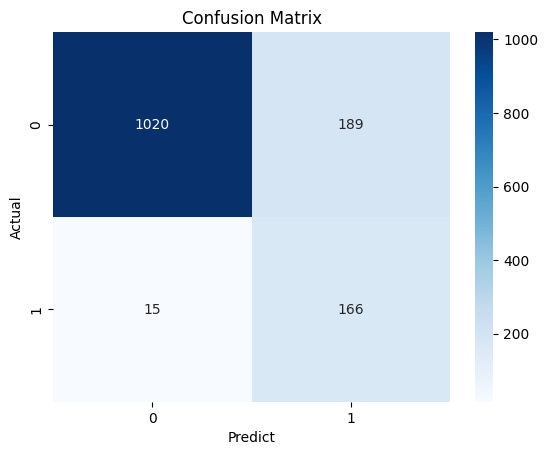

In [16]:
from utils import evaluate_cls_model

evaluate_cls_model(y_test_label, y_pred_label, True)

#### news 카테고리 분류 - 다중 분류

- https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset/notebook

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB

In [9]:
df = pd.read_csv('./dataset/news.csv')

df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [10]:
categories = df['category'].unique()
print(categories)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS']


In [11]:
## 분류에 라벨링

df['label'] = df['category'].factorize()[0]

df.head()

,headline,category,label
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,0
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,0
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,1
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,2
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,0


In [12]:
## 라벨링된 카테고리 확인

categories = df[['category', 'label']].drop_duplicates().sort_values('label')

categories

,category,label
0,U.S. NEWS,0
2,COMEDY,1
3,PARENTING,2
7,WORLD NEWS,3
8,CULTURE & ARTS,4
13,TECH,5
17,SPORTS,6
20,ENTERTAINMENT,7
21,POLITICS,8
29,WEIRD NEWS,9


In [36]:
X = df.headline.values
y = df.label.values

vectorizer = CountVectorizer(min_df=5, stop_words='english')

X_vec = vectorizer.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_vec.toarray(), y, test_size=0.25, random_state=42)

In [27]:
gnb = GNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)

yt  = pd.DataFrame(y_test, columns=['test'])
yp  = pd.DataFrame(y_pred, columns=['pred'])

pd.concat([yt, yp], axis=1)

,test,pred
0,8,3
1,10,10
2,9,0
3,17,24
4,8,8
...,...,...
2495,7,7
2496,8,8
2497,8,8
2498,8,0


In [29]:
## 모델 정확도 평가

print("Train : ", gnb.score(X_train, y_train))
print("Test : ", gnb.score(X_test, y_test))

Train :  0.8176
Test :  0.4676


In [34]:
from utils import evaluate_cls_model

evaluate_cls_model(y_test, y_pred)

TypeError: evaluate_cls_model() missing 1 required positional argument: 'if_binary'

#### Gaussian Naive Bayes
- 연속형 데이터가 정규 분포(Gaussian 분포)를 따른다고 가정하며, 특성 값이 실수인 경우
- 연속적인 데이터가 있는 경우, 예를 들어 키, 체중, 온도 등의 데이터에 적합

#### Multinomial Naive Bayes
- 특성 값이 이산형이고, 각 특성이 범주형 데이터(예: 단어 빈도)로 표현되는 경우
- 각 클래스에 대해 각 특성의 등장 빈도나 빈도를 기반으로 확률을 계산합니다. 이는 주로 텍스트 데이터 분류, 특히 단어 빈도에 기반한 모델링에 사용됩니다.
- 텍스트 분류, 문서 분류 등에서 단어 카운트나 TF-IDF 값을 사용할 때 적합

#### 정리
- **Gaussian Naive Bayes**: 연속형 변수 데이터, 정규 분포 가정
- **Multinomial Naive Bayes**: 이산형 변수 데이터, 특히 텍스트 데이터에 적합

In [40]:
## MultinomialNB

mnb = MNB()

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

## 모델 정확도 평가

print("Train : ", mnb.score(X_train, y_train))
print("Test : ", mnb.score(X_test, y_test))

Train :  0.7829333333333334
Test :  0.624
